In [13]:
import numpy as np 
import matplotlib.pyplot as plt

# Question 1

In [7]:
def random_sphere_points (n, d): 
    X = np.random.randn(n, d)
    norms = np.linalg.norm(X, axis=1, keepdims=True); 
    X /= norms 
    return X 
    

In [10]:
ds = np.array([2, 4, 10, 100, 1000]); 
n = 10000
points = []
for i in range (ds.shape[0]) :
    x = random_sphere_points(n, ds[i])
    points.append(x)



In [11]:
geodesic_dists = [np.abs(np.arcsin(P[:, 0])) for P in points]

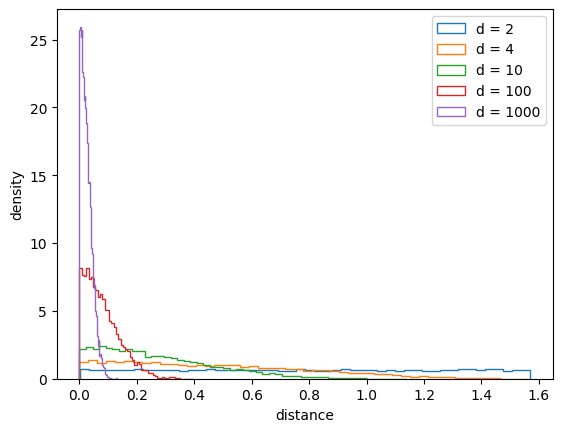

In [14]:
plt.figure()

for i in range(len(ds)):
    dist = geodesic_dists[i]  
    d = ds[i]                 
    plt.hist(dist, bins=50, density=True, histtype='step', label="d = " + str(d))

plt.xlabel('distance')
plt.ylabel('density')
plt.legend()
plt.show()


In [18]:
def create_normal_vector (d) : 
    x = np.random.randn(d) 
    x /= np.linalg.norm(x)
    return x; 

    

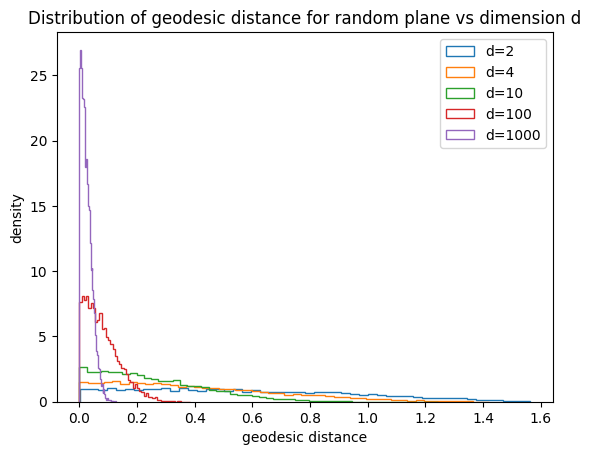

In [19]:
plt.figure()
for d in ds: 
    dim = d + 1
    n = create_normal_vector(dim) 
    X = random_sphere_points(10000, dim) 
    
    inner = X @ n 
    dist_G = np.abs(np.arcsin(inner))
    plt.hist(dist_G, bins=50, density=True, histtype='step', label=f'd={d}')

plt.xlabel('geodesic distance')
plt.ylabel('density')
plt.legend()
plt.title('Distribution of geodesic distance for random plane vs dimension d')
plt.show()    

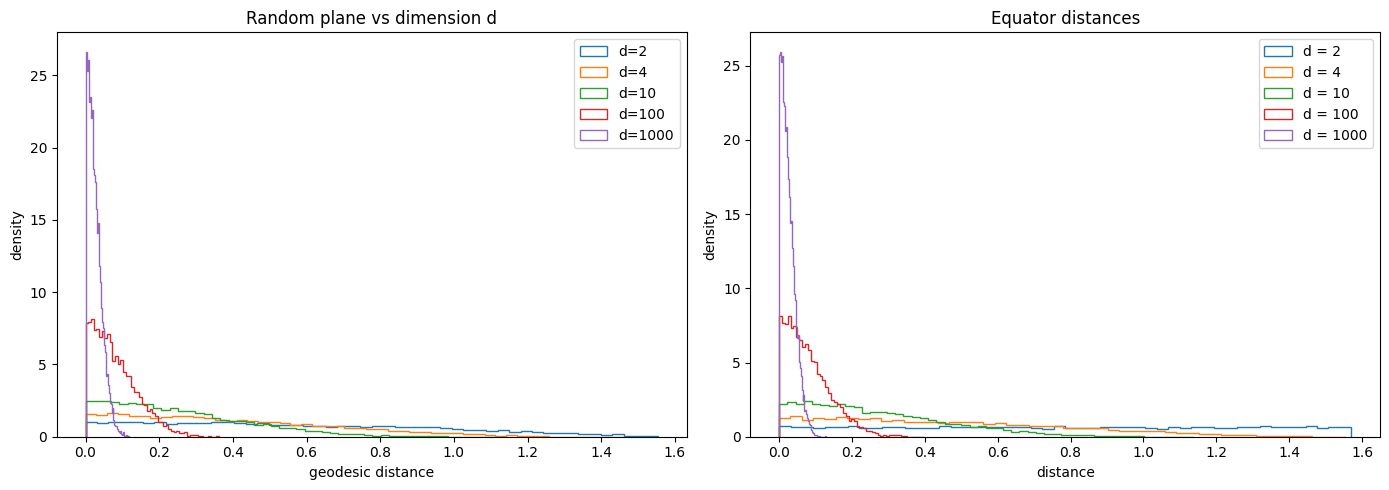

In [21]:
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(14, 5))   

# -----------------------
# Left plot: random plane
# -----------------------
for d in ds: 
    dim = d + 1
    n = create_normal_vector(dim) 
    X = random_sphere_points(10000, dim) 
    
    inner = X @ n 
    dist_G = np.abs(np.arcsin(inner))

    ax1.hist(dist_G, bins=50, density=True, histtype='step', label=f'd={d}')

ax1.set_xlabel('geodesic distance')
ax1.set_ylabel('density')
ax1.set_title('Random plane vs dimension d')
ax1.legend()


# -----------------------
# Right plot: equator distances
# -----------------------
for i in range(len(ds)):
    dist = geodesic_dists[i]  
    d = ds[i]                 
    ax2.hist(dist, bins=50, density=True, histtype='step', label="d = " + str(d))

ax2.set_xlabel('distance')
ax2.set_ylabel('density')
ax2.set_title('Equator distances')
ax2.legend()


plt.tight_layout()
plt.show()


In [26]:
def sample_point_sd (d) : 
    x = np.random.randn(d + 1)
    y = np.random.randn(d + 1)
    x /= np.linalg.norm(x)
    y /= np.linalg.norm(y)
    return x, y


def get_points_angle (x, y):
    angle = np.arccos(np.dot(x, y))
    return angle 
        

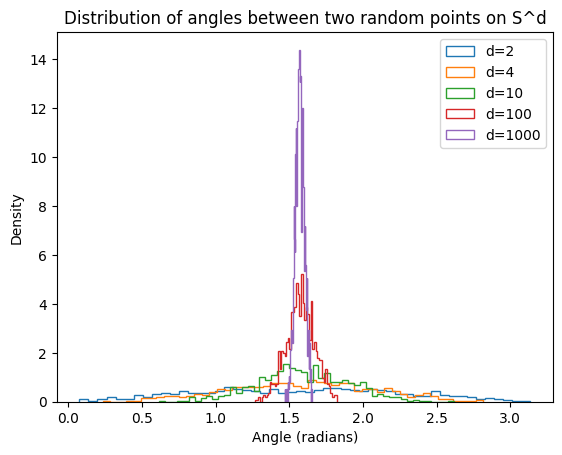

In [29]:
results = {}

for d in ds :  
    angles = []
    for i in range (1000): 
        x, y = sample_point_sd(d) 
        angle = get_points_angle(x, y)
        angles.append(angle)
    
    results[d] = np.array(angles)
    
    
plt.figure()

for d in ds: 
    plt.hist(results[d], bins = 50, density=True, histtype='step', label=f"d={d}")

plt.xlabel("Angle (radians)")
plt.ylabel("Density")
plt.title("Distribution of angles between two random points on S^d")
plt.legend()
plt.show()
        

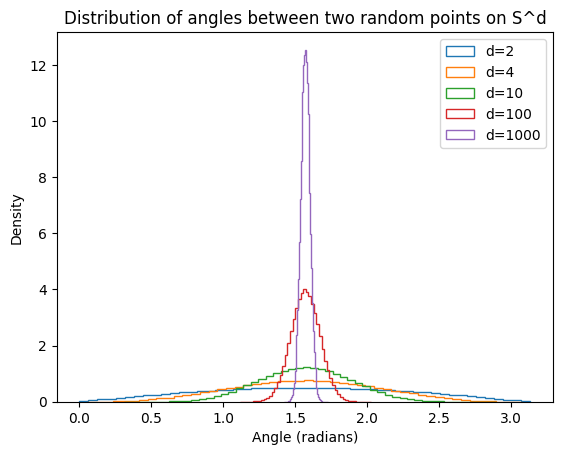

In [32]:
results = {}
for d in ds: 
    points = np.random.randn(1000, d + 1)
    points /= np.linalg.norm(points, axis=1, keepdims=True)
    angles = [] 
    for i in range (points.shape[0]): 
        x = points[i]
        for j in range (i + 1, points.shape[0]): 
            y = points[j]
            angle = get_points_angle(x, y)
            angles.append(angle)
    
    results[d] = np.array(angles)
    
    
plt.figure()

for d in ds: 
    plt.hist(results[d], bins = 50, density=True, histtype='step', label=f"d={d}")

plt.xlabel("Angle (radians)")
plt.ylabel("Density")
plt.title("Distribution of angles between two random points on S^d")
plt.legend()
plt.show()
            

In [39]:
n = 10000
a = 5000 
table = []
for d in ds: 
    distances = []
    for _ in range (n): 
        x, y = sample_point_sd(d)
        distances.append(np.abs(np.arcsin(x[0])))
    
    dist_mean = np.mean(distances)
    angles = []
    for _ in range (a):  
        x, y = sample_point_sd(d) 
        angle = get_points_angle(x, y)
        angles.append(angle)
    
    angle_mean = np.mean(angles)
    table.append((d, dist_mean, angle_mean, np.sqrt(d) * dist_mean))

        
print(f"{'d':>5} {'E[dist_equator]':>20} {'E[angle]':>20} {'d * E[dist]':>20}")

for row in table:
    d, dist_mean, angle_mean, prod = row
    print(f"{d:5d} {dist_mean:20.6f} {angle_mean:20.6f} {prod:20.6f}")


    d      E[dist_equator]             E[angle]          d * E[dist]
    2             0.571543             1.562293             0.808284
    4             0.409467             1.579700             0.818934
   10             0.256210             1.565869             0.810207
  100             0.079695             1.571261             0.796948
 1000             0.025355             1.571061             0.801809


----------------------------------------------------------------------------------------------------

# Question 2

In [41]:
import scipy as sc 
import sklearn.random_projection as skp

In [66]:
ds = [2, 3, 5, 10, 20] 
n = 1000
points = {}
for d in ds:
    p = np.random.uniform(-0.5, 0.5, size=(n, d))
    points[d] = p 


 نتیجه مطالعه درباره روش مونته‌کارلو, باید تعداد نقاط درون مکعب را به نقاط کل تقسیم کنیم و سپس در حجم مکعب ضرب کنیم

In [69]:
sphere_volumes = []
for d in ds: 
    p = points[d]
    cnt = 0
    for i in  range(p.shape[0]): 
        flag = True
        s = 0
        for j in range(p.shape[1]): 
            x = p[i, j]
            s += (x**2)
        if (s <= 0.25): 
            cnt += 1
            
    print(f"{d}: {cnt/1000}")
    sphere_volumes.append(cnt/1000)

2: 0.799
3: 0.498
5: 0.17
10: 0.002
20: 0.0


In [90]:
mean_dist = []
min_dists = []
for d in ds: 
    p = points[d]
    distances = []
    min_dist = []
    for i in range(p.shape[0]): 
        q = np.inf
        x = p[i]
        for j in range(p.shape[0]): 
            if (i == j): 
                continue 
            y = p[j] 
            
            distance = np.linalg.norm(x - y)
            q = min(q, distance)
            distances.append(distance)
        min_dist.append(q)
    mean_dist.append(np.mean(distances))
    min_dists.append(np.mean(min_dist))
    

for i in range (len(ds)):
    print(f"{ds[i]}: \n average distance = {mean_dist[i]} \n average minimum distance = {min_dists[i]} \n average/√d = {mean_dist[i]/(np.sqrt(ds[i])/6)}")
        
            

2: 
 average distance = 0.510461141466991 
 average minimum distance = 0.015851858177387483 
 average/√d = 2.165703207981209
3: 
 average distance = 0.669049825826475 
 average minimum distance = 0.05826419550838186 
 average/√d = 2.3176565822531257
5: 
 average distance = 0.880960450162968 
 average minimum distance = 0.17837864948856497 
 average/√d = 2.3638649424638545
10: 
 average distance = 1.2621613459448706 
 average minimum distance = 0.5016311743089141 
 average/√d = 2.3947827766857106
20: 
 average distance = 1.809858528628942 
 average minimum distance = 1.0363098731315044 
 average/√d = 2.428180019803238


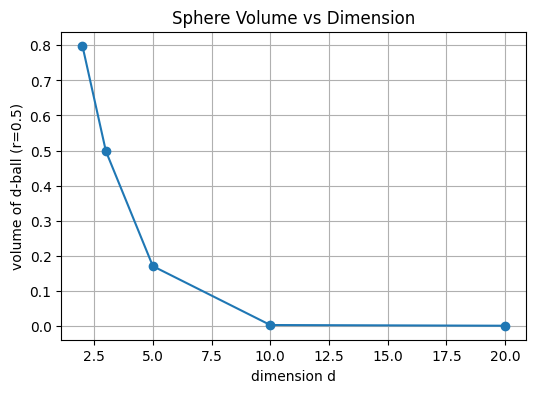

In [77]:

plt.figure(figsize=(6,4))

plt.plot(ds, sphere_volumes, marker='o')
plt.xlabel("dimension d")
plt.ylabel("volume of d-ball (r=0.5)")
plt.title("Sphere Volume vs Dimension")
plt.grid(True)

plt.show()

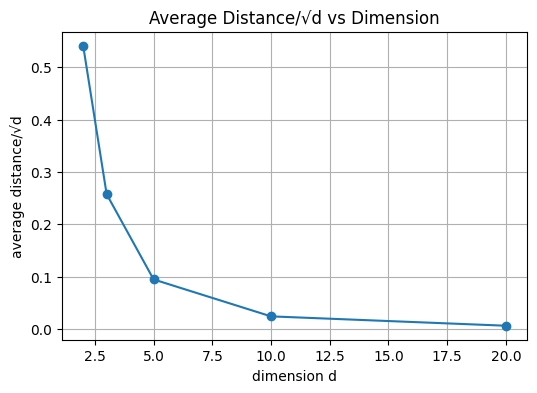

In [89]:
m = mean_dist
for i in range(len(ds)): 
    m[i]/= (np.sqrt(ds[i])/6)

plt.figure(figsize=(6,4))

plt.plot(ds, m, marker='o')
plt.xlabel("dimension d")
plt.ylabel("average distance/√d")
plt.title("Average Distance/√d vs Dimension")
plt.grid(True)

plt.show()

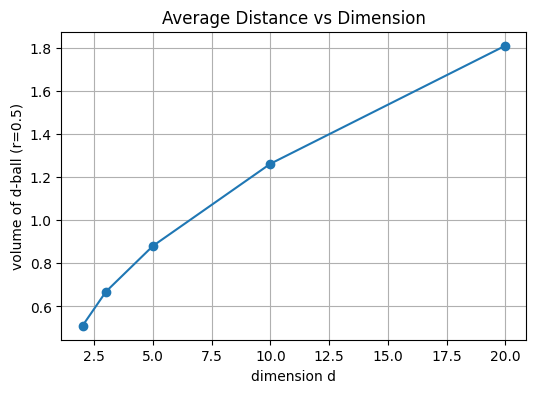

In [ ]:

plt.figure(figsize=(6,4))

plt.plot(ds, mean_dist, marker='o')
plt.xlabel("dimension d")
plt.ylabel("volume of d-ball (r=0.5)")
plt.title("Average Distance vs Dimension")
plt.grid(True)

plt.show()

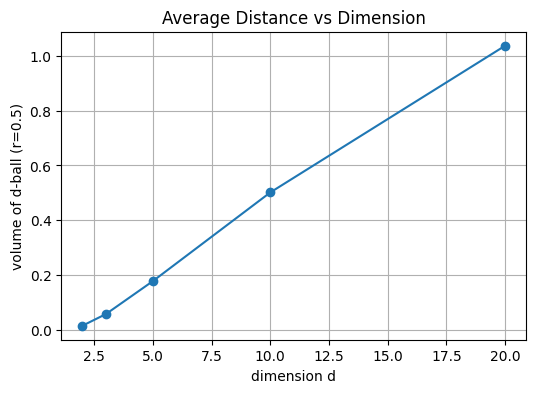

In [84]:

plt.figure(figsize=(6,4))

plt.plot(ds, min_dists, marker='o')
plt.xlabel("dimension d")
plt.ylabel("volume of d-ball (r=0.5)")
plt.title("Average Distance vs Dimension")
plt.grid(True)

plt.show()

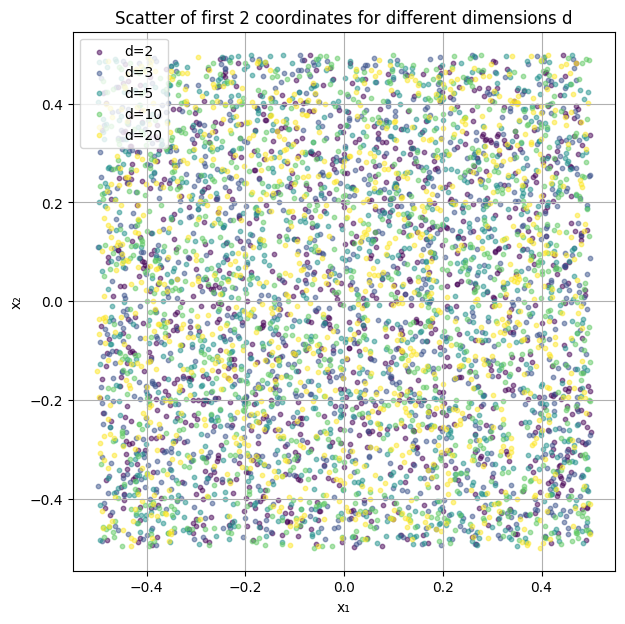

In [92]:

colors = plt.cm.viridis(np.linspace(0, 1, len(ds)))

plt.figure(figsize=(7,7))

for idx, d in enumerate(ds):
    P = points[d]
    x1 = P[:, 0]
    x2 = P[:, 1]
    
    plt.scatter(
        x1, x2,
        color=colors[idx],
        label=f"d={d}",
        s=10,
        alpha=0.5
    )

plt.xlabel("x₁")
plt.ylabel("x₂")
plt.title("Scatter of first 2 coordinates for different dimensions d")
plt.legend()
plt.axis("equal")
plt.grid(True)
plt.show()


در صورتی که بخواهیم برای هر d توزیع را جداگانه ببینیم کافیست بلوک زیر را اجرا کنیم

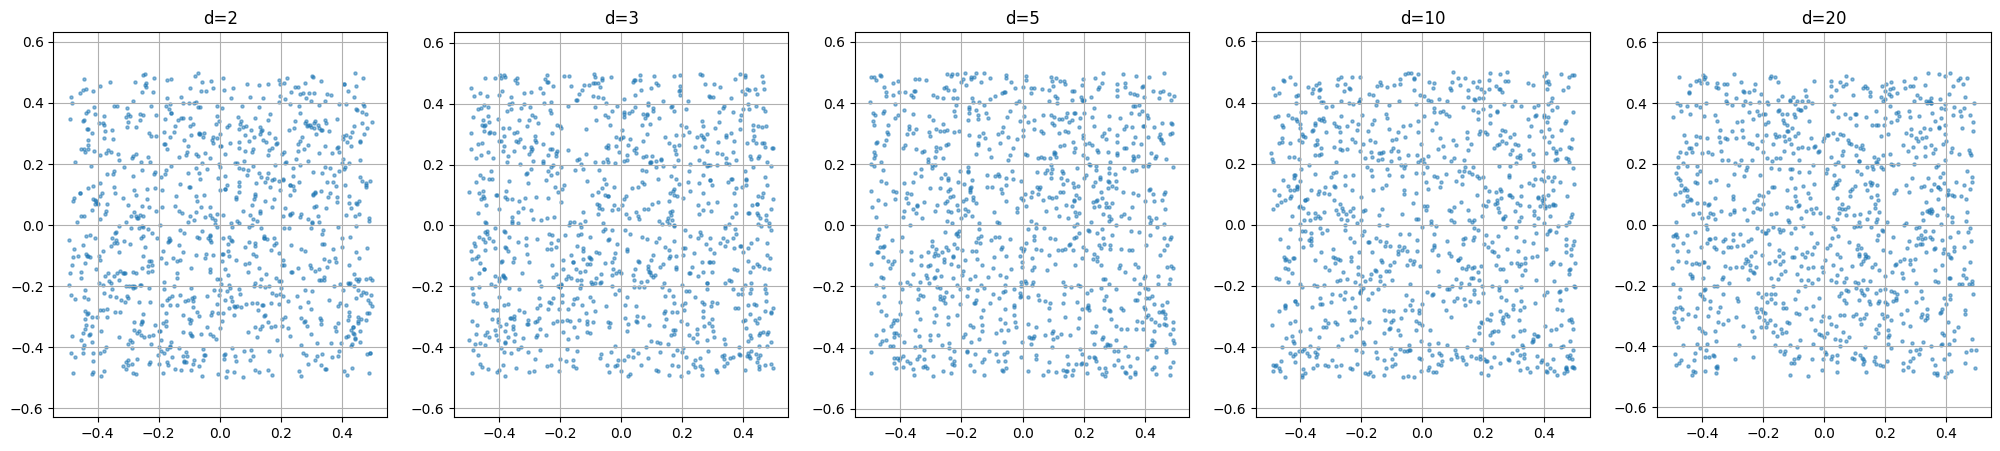

In [93]:
import matplotlib.pyplot as plt

num_d = len(ds)
plt.figure(figsize=(5*num_d, 5))

for idx, d in enumerate(ds):
    P = points[d]
    x1 = P[:, 0]
    x2 = P[:, 1]

    plt.subplot(1, num_d, idx+1)
    plt.scatter(x1, x2, s=5, alpha=0.5)
    plt.title(f"d={d}")
    plt.axis("equal")
    plt.grid(True)

plt.show()


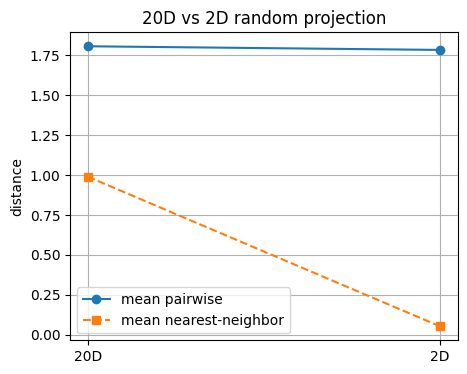

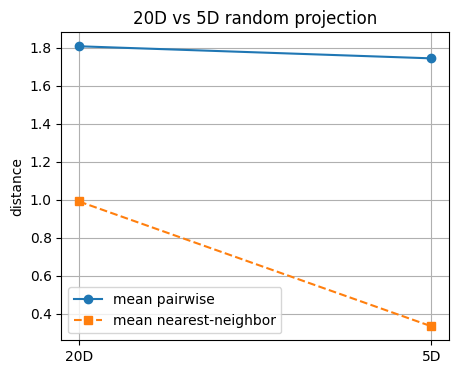

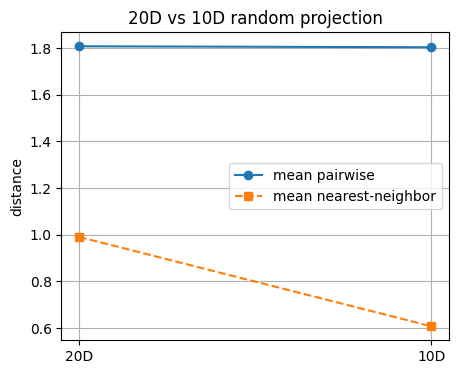

In [95]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.random_projection import GaussianRandomProjection

n = 2000
d_original = 20
X_20 = np.random.uniform(-0.5, 0.5, size=(n, d_original))

def distance_matrix(X):
    diff = X[:, None, :] - X[None, :, :]
    D = np.linalg.norm(diff, axis=2)
    return D

def mean_pairwise_distance(X):
    D = distance_matrix(X)
    iu = np.triu_indices_from(D, k=1)
    return D[iu].mean()

def mean_nearest_neighbor_distance(X):
    D = distance_matrix(X)
    np.fill_diagonal(D, np.inf)
    nn = np.min(D, axis=1)
    return nn.mean()

mp_orig = mean_pairwise_distance(X_20)
mnn_orig = mean_nearest_neighbor_distance(X_20)

target_dims = [2, 5, 10]

for k in target_dims:
    proj = GaussianRandomProjection(n_components=k, random_state=0)
    X_k = proj.fit_transform(X_20)
    mp_k = mean_pairwise_distance(X_k)
    mnn_k = mean_nearest_neighbor_distance(X_k)

    plt.figure(figsize=(5,4))
    xs = [0, 1]
    plt.plot(xs, [mp_orig, mp_k], 'o-', label='mean pairwise')
    plt.plot(xs, [mnn_orig, mnn_k], 's--', label='mean nearest-neighbor')
    plt.xticks(xs, [f'20D', f'{k}D'])
    plt.ylabel('distance')
    plt.title(f'20D vs {k}D random projection')
    plt.grid(True)
    plt.legend()
    plt.show()


# Question 3

In [99]:
from sklearn.datasets import fetch_20newsgroups
from sklearn.feature_extraction.text import TfidfVectorizer

data = fetch_20newsgroups(subset='all')

vectorizer = TfidfVectorizer(max_features=20000, dtype='float32', norm='l2')
X = vectorizer.fit_transform(data.data)

X = X.toarray()
X.shape


/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/sklearn/feature_extraction/text.py:2043: UserWarning: Only (<class 'numpy.float64'>, <class 'numpy.float32'>, <class 'numpy.float16'>) 'dtype' should be used. float32 'dtype' will be converted to np.float64.
  warnings.warn(


(18846, 20000)

In [100]:
from sklearn.random_projection import johnson_lindenstrauss_min_dim
import pandas as pd

n_values = [2000, 5000, 10000, 15000]
eps_values = [0.1, 0.2, 0.3, 0.5]

m_table = np.zeros((len(n_values), len(eps_values)), dtype=int)

for i, n in enumerate(n_values):
    for j, eps in enumerate(eps_values):
        m = johnson_lindenstrauss_min_dim(n_samples=n, eps=eps)
        m_table[i, j] = m

df_m = pd.DataFrame(m_table, index=n_values, columns=eps_values)
df_m


,0.1,0.2,0.3,0.5
2000,6515,1754,844,364
5000,7300,1965,946,408
10000,7894,2125,1023,442
15000,8242,2219,1068,461


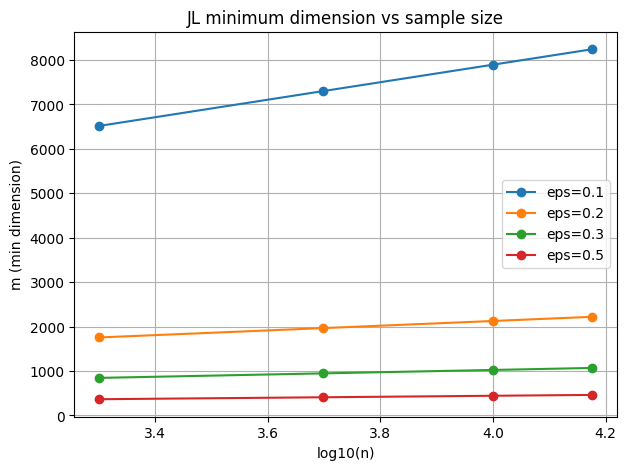

In [102]:
import matplotlib.pyplot as plt
import numpy as np
from sklearn.random_projection import johnson_lindenstrauss_min_dim

plt.figure(figsize=(7,5))

for eps in eps_values:
    m_list = [johnson_lindenstrauss_min_dim(n_samples=n, eps=eps) for n in n_values]
    plt.plot(np.log10(n_values), m_list, marker='o', label=f"eps={eps}")

plt.xlabel("log10(n)")
plt.ylabel("m (min dimension)")
plt.title("JL minimum dimension vs sample size")
plt.grid(True)
plt.legend()
plt.show()


In [103]:
m_values = [50, 100, 200, 500, 1000, 2000, 5000]

projected = {}

for m in m_values:
    gp = GaussianRandomProjection(n_components=m, random_state=0)
    X_m = gp.fit_transform(X)
    projected[m] = X_m


In [104]:
N_pairs = 50000
n_samples = X.shape[0]

pairs = []
while len(pairs) < N_pairs:
    i = np.random.randint(0, n_samples)
    j = np.random.randint(0, n_samples)
    if i != j:
        if np.linalg.norm(X[i] - X[j]) > 0:
            pairs.append((i, j))

pairs = np.array(pairs)
len(pairs)


50000

In [105]:
results = {}

orig_dists = np.linalg.norm(X[pairs[:,0]] - X[pairs[:,1]], axis=1)

for m in m_values:
    Xm = projected[m]
    mapped_dists = np.linalg.norm(Xm[pairs[:,0]] - Xm[pairs[:,1]], axis=1)
    ratios = mapped_dists / orig_dists
    results[m] = ratios


In [106]:
eps_check = [0.02, 0.05, 0.10]

summary = {}

for m in m_values:
    r = results[m]
    mean = np.mean(r)
    median = np.median(r)
    p5 = np.percentile(r, 5)
    p95 = np.percentile(r, 95)
    inside = {eps: np.mean((r >= 1-eps) & (r <= 1+eps)) for eps in eps_check}
    
    summary[m] = {
        "mean": mean,
        "median": median,
        "p5": p5,
        "p95": p95,
        **{f"inside_{eps}": inside[eps] for eps in eps_check}
    }

summary


{50: {'mean': 0.9936483,
  'median': 0.992258,
  'p5': 0.8322525203227997,
  'p95': 1.160096603631973,
  'inside_0.02': 0.15968,
  'inside_0.05': 0.38074,
  'inside_0.1': 0.67948},
 100: {'mean': 0.9969451,
  'median': 0.99638927,
  'p5': 0.8818430542945862,
  'p95': 1.1136476278305052,
  'inside_0.02': 0.22458,
  'inside_0.05': 0.52216,
  'inside_0.1': 0.84312},
 200: {'mean': 0.99804103,
  'median': 0.9976438,
  'p5': 0.917017450928688,
  'p95': 1.0796740293502807,
  'inside_0.02': 0.30944,
  'inside_0.05': 0.68312,
  'inside_0.1': 0.95688},
 500: {'mean': 0.9995596,
  'median': 0.9996754,
  'p5': 0.9475340455770492,
  'p95': 1.0517017185688018,
  'inside_0.02': 0.46932,
  'inside_0.05': 0.88538,
  'inside_0.1': 0.99858},
 1000: {'mean': 0.9988912,
  'median': 0.9988048,
  'p5': 0.9624529480934143,
  'p95': 1.035467153787613,
  'inside_0.02': 0.62936,
  'inside_0.05': 0.97526,
  'inside_0.1': 1.0},
 2000: {'mean': 0.99957436,
  'median': 0.99954236,
  'p5': 0.9738859444856643,
  'p95

In [107]:
pd.DataFrame(summary).T

,mean,median,p5,p95,inside_0.02,inside_0.05,inside_0.1
50,0.993648,0.992258,0.832253,1.160097,0.15968,0.38074,0.67948
100,0.996945,0.996389,0.881843,1.113648,0.22458,0.52216,0.84312
200,0.998041,0.997644,0.917017,1.079674,0.30944,0.68312,0.95688
500,0.999560,0.999675,0.947534,1.051702,0.46932,0.88538,0.99858
1000,0.998891,0.998805,0.962453,1.035467,0.62936,0.97526,1.00000
2000,0.999574,0.999542,0.973886,1.025537,0.79928,0.99858,1.00000
5000,0.999848,0.999800,0.983509,1.016130,0.95500,1.00000,1.00000


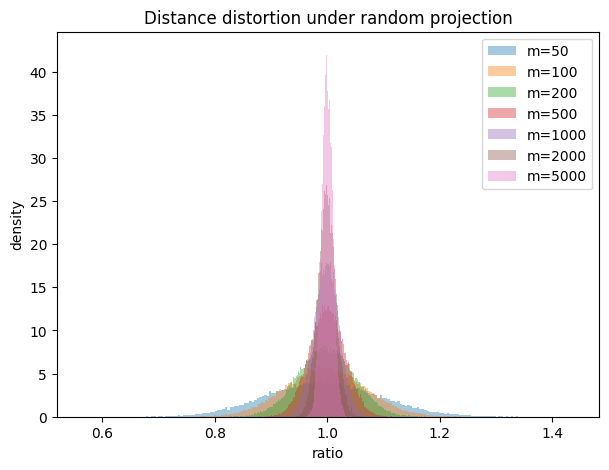

In [108]:
plt.figure(figsize=(7,5))

for m in m_values:
    plt.hist(results[m], bins=200, density=True, alpha=0.4, label=f"m={m}")

plt.xlabel("ratio")
plt.ylabel("density")
plt.title("Distance distortion under random projection")
plt.legend()
plt.show()
